# 1. Вебинар по RL

Попробуем применить RL в рамках задачи с шахматами


## Определение RL

Обучение с подкреплением (Reinforcement Learning, RL) — это метод машинного обучения, в котором агент учится, взаимодействуя со средой, чтобы максимизировать некую кумулятивную награду.

В отличие от обучения с учителем, где у нас есть явные пары "входные данные - правильный ответ", в RL у нас нет прямых указаний о том, какое действие лучше всего выполнить в каждом конкретном случае. Агенту приходится опираться на обратную связь в виде награды, чтобы узнать, правильно ли он действовал.

## Основные компоненты RL

* Инициализация: Агент начинает в каком-то начальном состоянии и не имеет представления о среде.
* Выбор действия: Агент выбирает действие на основе текущего состояния.
* Взаимодействие: Среда реагирует на действие агента и возвращает новое состояние и награду.
* Обучение: Агент обновляет свои знания на основе полученной награды.
* Повтор: Процесс повторяется до достижения конечного состояния или заданного числа шагов.


В RL агент постоянно исследует среду, выбирая действия, которые максимизируют его кумулятивную награду. Это делает RL особенно привлекательным для задач, где правильное решение не явно задано или известно.



## 2. Библиотека python-chess

In [ ]:
# Для начала установим библиотеку python-chess:
!pip install python-chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00


In [ ]:
import chess

## Базовые операции с библиотекой


Доска шахмат создается очень просто:

In [ ]:
board = chess.Board()
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


**Совершение ходов**

В python-chess есть несколько способов представления и выполнения ходов:

1) **Стандартная алгебраическая нотация (SAN)**

**Что это?**

Это традиционный способ записи шахматных ходов, который часто используется в книгах и обучающих материалах. Например, когда ферзь двигается на клетку d4, записывают Qd4.

**Примеры:**

e4: Пешка передвигается на клетку e4.

Nf3: Конь (обозначается буквой N на английском) передвигается на клетку f3.

exd5: Пешка с клетки e "бьет" или "занимает" клетку d5.

**Применение в коде:**

In [ ]:
move = board.parse_san("e4")  # Преобразование нотации в ход
board.push(move)  # Совершение хода на доске

In [ ]:
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R


**2) Универсальная шахматная нотация (UCI)**

**Что это?**

Это более "технический" формат записи, который часто используется компьютерными программами и движками. Ход описывается начальной и конечной позицией без учета типа фигуры.

**Примеры:**

e2e4: Пешка передвигается с клетки e2 на e4.
g1f3: Фигура (в данном случае конь) двигается с g1 на f3.

**Применение в коде:**

In [ ]:
move = chess.Move.from_uci("e2e4")  # Преобразование нотации в ход
board.push(move)  # Совершение хода на доске

**3) Создание хода напрямую**

**Что это?**

Это метод, где вы явно указываете начальную и конечную позицию хода. В python-chess каждая клетка имеет свой уникальный идентификатор.

**Пример:**

Для передвижения пешки с клетки e2 на e4, вы должны указать идентификаторы этих клеток.

**Применение в коде:**

In [ ]:
move = chess.Move(chess.E2, chess.E4)  # Создание хода по начальной и конечной клетке
board.push(move)  # Совершение хода на доске

Проверка конца игры

Мы можем проверить, окончена ли игра:

In [ ]:
board.is_game_over()
# Этот метод вернет True, если игра закончена (мат, пат или другая причина), и False в противном случае.

False

Для более красивой визуализации в Colab мы можем использовать chess.svg:

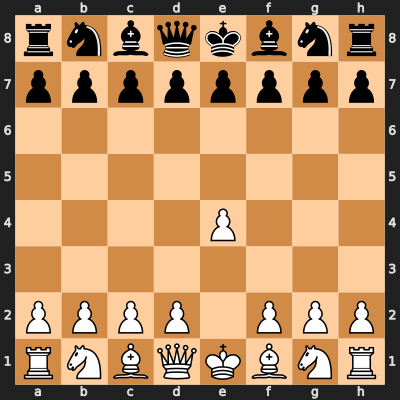

In [ ]:
from IPython.display import display, SVG
import chess.svg
# Отображение доски
display(SVG(chess.svg.board(board=board, size=400)))

Получение возможных ходов

Для получения списка всех возможных ходов в текущем состоянии:

In [ ]:
moves = list(board.legal_moves)
print(moves)

[Move.from_uci('g8h6'), Move.from_uci('g8f6'), Move.from_uci('b8c6'), Move.from_uci('b8a6'), Move.from_uci('h7h6'), Move.from_uci('g7g6'), Move.from_uci('f7f6'), Move.from_uci('e7e6'), Move.from_uci('d7d6'), Move.from_uci('c7c6'), Move.from_uci('b7b6'), Move.from_uci('a7a6'), Move.from_uci('h7h5'), Move.from_uci('g7g5'), Move.from_uci('f7f5'), Move.from_uci('e7e5'), Move.from_uci('d7d5'), Move.from_uci('c7c5'), Move.from_uci('b7b5'), Move.from_uci('a7a5')]


Отмена последнего хода

Если вы хотите отменить последний ход:

In [ ]:
board.pop()

Move.from_uci('e2e4')

## 3. Преобразование шахматной игры в задачу RL

Чтобы применить обучение с подкреплением к игре в шахматы, нам необходимо правильно определить основные компоненты RL в контексте шахматной игры.

### Состояние

**Определение**: В RL состояние представляет текущее положение агента в среде.

В контексте шахмат состоянием является текущее расположение всех фигур на доске.

Мы можем представить состояние доски в виде строки FEN (Forsyth-Edwards Notation):

FEN (Forsyth-Edwards Notation) — это стандартная нотация, используемая для представления позиции на шахматной доске. С её помощью можно быстро и точно передать расположение фигур на доске, а также другую информацию о текущем состоянии игры, такую как право на рокировку, возможность взятия на проходе и количество ходов без передвижения пешек или взятия фигур.

Строка FEN состоит из нескольких полей, разделенных пробелами:

Позиция фигур: Отображает расположение фигур на доске, начиная с 8-й горизонтали и двигаясь к 1-й. Пустые клетки представлены числами от 1 до 8. Фигуры обозначаются следующими символами:

Белые фигуры: P (пешка), N (конь), B (слон), R (ладья), Q (ферзь), K (король).
Черные фигуры: p, n, b, r, q, k.
Например, начальная позиция представляется как: rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR

Ходящая сторона: Одним символом обозначается, кто ходит следующим - белые (w) или черные (b).

Право на рокировку: Обозначает возможность рокировки для каждой стороны.

K означает, что у белых есть право на короткую рокировку.
Q — на длинную рокировку.
k и q — аналогичные права для черных.
Если рокировка невозможна для обеих сторон, ставится -.
Взятие на проходе: Если последний ход был двойным ходом пешки, поле, на которое можно взять эту пешку "на проходе", указывается здесь. Если взятия на проходе нет, ставится -.

Полусуточный счетчик: Считает количество ходов (полуходов) с момента последнего движения пешки или взятия фигуры. Используется для правила 50 ходов, по которому игра может быть объявлена ничьей, если 50 ходов подряд не было сделано ни одного хода пешкой и не было взято ни одной фигуры.

Счетчик ходов: Считает количество полных ходов. Начинается с 1, и увеличивается после каждого хода черных.

Пример строки FEN для начальной позиции на шахматной доске:

rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1

Эта нотация чрезвычайно полезна для быстрой установки специфических позиций на доске или для сохранения и загрузки партий.


In [ ]:
fen_state = board.fen()
print(fen_state)

rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 2


### Действие

**Определение**: Действие - это то, что агент может предпринять в данном состоянии среды.

В шахматах действиями являются все возможные ходы, которые игрок может сделать из текущего состояния.

In [ ]:
possible_moves = list(board.legal_moves)
possible_moves

[Move.from_uci('g8h6'),
 Move.from_uci('g8f6'),
 Move.from_uci('b8c6'),
 Move.from_uci('b8a6'),
 Move.from_uci('h7h6'),
 Move.from_uci('g7g6'),
 Move.from_uci('f7f6'),
 Move.from_uci('e7e6'),
 Move.from_uci('d7d6'),
 Move.from_uci('c7c6'),
 Move.from_uci('b7b6'),
 Move.from_uci('a7a6'),
 Move.from_uci('h7h5'),
 Move.from_uci('g7g5'),
 Move.from_uci('f7f5'),
 Move.from_uci('e7e5'),
 Move.from_uci('d7d5'),
 Move.from_uci('c7c5'),
 Move.from_uci('b7b5'),
 Move.from_uci('a7a5')]

### Награда

**Определение**: Награда — это численное значение, которое среда возвращает агенту после каждого действия.

В шахматах награда может зависеть от многих факторов. Простая модель награды может выглядеть так:

*   +1 за поимку фигуры противника.
*   -1 за потерю своей фигуры.
*   +10 за поставленный мат противнику.
*   -10 за мат от противника.
*   0 за все другие ходы.

Однако это очень упрощенная модель, и в реальных условиях вы, возможно, захотите использовать более сложные и тонко настроенные системы наград.

### Реализация RL-агента

Для простоты давайте рассмотрим агента, который в начале выбирает ходы случайно. Это будет наша исходная точка, от которой мы будем исходить при дальнейшем обучении.

In [ ]:
import random

def choose_move(board):
    return random.choice(list(board.legal_moves))

##  4. Создание простого RL-агента
### Базовая структура агента

Прежде чем внедрять алгоритмы RL, начнем с базовой структуры агента:

In [ ]:
class ChessAgent:
    def __init__(self):
        pass

    def choose_move(self, board):
        raise NotImplementedError

    def receive_reward(self, reward):
        raise NotImplementedError

    def game_over(self):
        raise NotImplementedError

### Простейший случайный агент

Прежде чем перейти к сложному RL, создадим агента, который просто выбирает ход случайным образом:

In [ ]:
class RandomChessAgent(ChessAgent):
    def choose_move(self, board):
        return random.choice(list(board.legal_moves))

    def receive_reward(self, reward):
        pass  # На данный момент он не делает ничего с полученной наградой

    def game_over(self):
        pass  # Может быть использовано для сброса внутреннего состояния или статистики

### Взаимодействие с окружением и обучение

Для начала определим функцию, которая определяет награду на основе событий игры:

In [ ]:
def determine_reward(board):
    if board.is_checkmate():
        if board.turn == chess.WHITE:
            return -10  # Мат черным
        else:
            return 10   # Мат белым
    elif board.is_stalemate() or board.is_insufficient_material():
        return 0
    else:
        # Можно расширить для других событий, например, +1 за поимку фигуры противника и т.д.
        return 0

Теперь создадим функцию, которая позволяет агенту играть:

In [ ]:
def play_game(agent):
    board = chess.Board()
    while not board.is_game_over():
        move = agent.choose_move(board)
        board.push(move)

        reward = determine_reward(board)
        agent.receive_reward(reward)

    agent.game_over()

### Визуализация игры и статистика

In [ ]:
def play_game(agent, display_svg=True, show_logs=True):
    board = chess.Board()
    move_counter = 0

    while not board.is_game_over():
        move = agent.choose_move(board)
        board.push(move)

        move_counter += 1

        if display_svg:
            print(f"Ход {move_counter}:")
            #print(board)
            #print("\n" + "-"*40 + "\n")
            display(SVG(chess.svg.board(board=board, size=100)))

        reward = determine_reward(board)
        agent.receive_reward(reward)

    agent.game_over()

    # Краткая статистика
    if show_logs:
        print("Игра завершилась!")
        if board.is_checkmate():
            print("Результат: мат!")
        elif board.is_stalemate():
            print("Результат: пат!")
        elif board.is_insufficient_material():
            print("Результат: недостаточно материала для мата!")
        else:
            print("Результат: другая ничья!")

        print(f"Всего ходов: {move_counter}")


### Запуск и тестирование

Теперь мы можем запустить и протестировать нашего случайного агента:


In [ ]:
agent = RandomChessAgent()
play_game(agent)

На этом этапе у вас есть простой шахматный агент, который делает случайные ходы. Этот агент служит основой для дальнейших улучшений и внедрения алгоритмов RL.

## 5. Обучение RL-агента играть в шахматы

Для простоты рассмотрим Q-обучение, один из наиболее популярных методов обучения с подкреплением.

### Кратко о Q-обучении
Q-обучение основано на идее оценки "качества" комбинации состояний и действий (Q-значение). Агент стремится узнать, какое действие приведет к наибольшей награде в каждом состоянии.

https://iq.opengenus.org/content/images/2019/09/1.gif

### Инициализация Q-таблицы

Из-за огромного числа возможных состояний в шахматах мы будем использовать упрощенную версию Q-таблицы, которая будет учитывать только последний ход и возможные ответы на него.

In [ ]:
import numpy as np

class QLearningChessAgent(ChessAgent):
    # Конструктор класса
    def __init__(self, learning_rate=0.1, discount_factor=0.9):
        super().__init__()  # Вызов конструктора родительского класса

        # Q-таблица для хранения Q-значений для каждой пары (состояние, действие)
        self.q_table = {}

        # Скорость обучения: определяет, насколько новое Q-значение заменяет старое
        self.learning_rate = learning_rate

        # Фактор дисконтирования: определяет важность ожидаемых будущих наград
        self.discount_factor = discount_factor

        # Последнее состояние и действие, выбранные агентом
        self.last_state_action = None

    # Метод для выбора хода на основе текущего состояния доски
    def choose_move(self, board):
        # Текущее состояние доски представленное в формате FEN
        state = board.fen()

        # Если данное состояние еще не встречалось, добавляем его в Q-таблицу
        if state not in self.q_table:
            self.q_table[state] = {}
            for move in board.legal_moves:
                self.q_table[state][move.uci()] = 0

        # Эксплорация vs эксплуатация:
        # С вероятностью 10% выбираем случайный ход (эксплорация)
        if np.random.uniform(0, 1) < 0.1:
            action = random.choice(list(board.legal_moves)).uci()
        else:
            # В противном случае выбираем действие с максимальным Q-значением (эксплуатация)
            action = max(self.q_table[state], key=self.q_table[state].get)

        # Сохраняем выбранное действие и текущее состояние
        self.last_state_action = (state, action)

        # Возвращаем выбранный ход
        return chess.Move.from_uci(action)

    # Метод для обработки полученной награды после выполнения действия
    def receive_reward(self, reward):
        # Если агент еще не совершил ни одного действия, выходим
        if not self.last_state_action:
            return

        # Извлекаем предыдущее состояние и действие
        prev_state, prev_action = self.last_state_action

        # Вычисляем максимальное будущее Q-значение
        max_future_q = max(self.q_table[prev_state].values())

        # Обновляем Q-значение с учетом полученной награды и максимального будущего Q-значения
        self.q_table[prev_state][prev_action] = (1 - self.learning_rate) * self.q_table[prev_state][prev_action] + \
                                                self.learning_rate * (reward + self.discount_factor * max_future_q)

    # Метод, который вызывается, когда игра завершается
    def game_over(self):
        # Сбрасываем последние сохраненные состояние и действие
        self.last_state_action = None


"Эксплорация" и "эксплуатация" являются ключевыми понятиями в обучении с подкреплением и описывают принципиальный выбор, перед которым стоит агент на каждом шаге своего обучения.

* Эксплорация (Exploration):

Агент пробует разные действия, чтобы узнать, какие награды они приносят.
Это необходимо для того, чтобы агент мог обнаружить новые и потенциально лучшие стратегии поведения.
Это своего рода "исследование" неизведанных действий.

* Эксплуатация (Exploitation):

Когда агент уже знает, какие действия приносят хорошие награды, он может "эксплуатировать" эту информацию, повторяя эти действия.
Это позволяет агенту максимизировать свою награду на основе имеющихся знаний.
Проблема в том, что если агент только эксплуатирует свои текущие знания, он может упустить возможность обнаружить еще более выгодные стратегии. С другой стороны, если агент постоянно исследует новые действия, игнорируя то, что он уже знает, это может привести к упущенной выгоде.

Поэтому большинство алгоритмов обучения с подкреплением стараются находить баланс между эксплорацией и эксплуатацией. В методе Q-обучения это часто делается с помощью так называемой стратегии ε-greedy (эпсилон-жадной), где с некоторой маленькой вероятностью ε выбирается случайное действие (эксплорация), а в остальных случаях выбирается действие с максимальным известным Q-значением (эксплуатация).

### Обучение агента
Для обучения нашего агента нам понадобится играть множество игр и постепенно обновлять Q-таблицу.

In [ ]:
def train_agent(agent, games=1000):
    for _ in range(games):
        play_game(agent, False, True)

Теперь мы можем инициализировать и обучить нашего агента:

In [ ]:
agent = QLearningChessAgent()
train_agent(agent)

Игра завершилась!
Результат: другая ничья!
Всего ходов: 53
Игра завершилась!
Результат: другая ничья!
Всего ходов: 40
Игра завершилась!
Результат: другая ничья!
Всего ходов: 24
Игра завершилась!
Результат: другая ничья!
Всего ходов: 26
Игра завершилась!
Результат: другая ничья!
Всего ходов: 65
Игра завершилась!
Результат: другая ничья!
Всего ходов: 124
Игра завершилась!
Результат: другая ничья!
Всего ходов: 30
Игра завершилась!
Результат: другая ничья!
Всего ходов: 80
Игра завершилась!
Результат: другая ничья!
Всего ходов: 48
Игра завершилась!
Результат: другая ничья!
Всего ходов: 42
Игра завершилась!
Результат: другая ничья!
Всего ходов: 23
Игра завершилась!
Результат: другая ничья!
Всего ходов: 46
Игра завершилась!
Результат: другая ничья!
Всего ходов: 186
Игра завершилась!
Результат: другая ничья!
Всего ходов: 33
Игра завершилась!
Результат: другая ничья!
Всего ходов: 55
Игра завершилась!
Результат: другая ничья!
Всего ходов: 28
Игра завершилась!
Результат: другая ничья!
Всего ходов

После этого агент должен быть способен делать более осознанные ходы, чем простой случайный выбор. Однако следует помнить, что для достижения действительно высокого уровня мастерства в шахматах необходимо использовать более сложные методы и архитектуры, такие как глубокое обучение с подкреплением.



## 6. Применение готового RL-агента

### Тестирование агента против случайного агента
Для начала проверим, насколько хорошо наш RL-агент играет против базового случайного агента.

In [ ]:
def play_against_random(agent):
    board = chess.Board()
    while not board.is_game_over():
        if board.turn == chess.WHITE:
            move = agent.choose_move(board)  # RL-агент играет белыми
        else:
            move = random.choice(list(board.legal_moves))  # Случайный агент играет черными
        board.push(move)

    if board.is_checkmate():
        if board.turn == chess.WHITE:
            return "Random Agent Wins"
        else:
            return "RL Agent Wins"
    else:
        return "Draw"

results = [play_against_random(agent) for _ in range(100)]
print(f"RL Agent Wins: {results.count('RL Agent Wins')} times")
print(f"Random Agent Wins: {results.count('Random Agent Wins')} times")
print(f"Draws: {results.count('Draw')} times")

RL Agent Wins: 1 times
Random Agent Wins: 33 times
Draws: 66 times


### Визуализация партии
Мы можем визуализировать одну из партий, чтобы увидеть, как агент принимает решения на каждом шаге.

In [ ]:
def visualize_game(agent):
    board = chess.Board()
    iter = 0
    while not board.is_game_over():
        iter+=1
        if board.turn == chess.WHITE:
            move = agent.choose_move(board)
        else:
            move = random.choice(list(board.legal_moves))
        display(SVG(chess.svg.board(board=board, size=100)))
        print(f"{chess.COLOR_NAMES[board.turn].capitalize()} made move: {move.uci()}\n")
        board.push(move)
    print(f"Game Over! {iter} steps")
    print(board.result())

visualize_game(agent)

### Улучшение и дальнейшие эксперименты
* Сравнение с другими стратегиями:
* * Простые стратегии:
* * * Агент на основе эвристик: Создайте агента, который выбирает ходы на основе простых эвристических правил, например, предпочтение ходов, которые приводят к поимке вражеских фигур или сохраняют своего короля в безопасности.

* * * Minimax-агент: Это классический алгоритм для игр с двумя игроками. Агент просматривает дерево игры на несколько ходов вперед и выбирает наилучший ход на основе минимаксной оценки.

* * Тестирование:
* * * Играйте множество партий между вашим RL-агентом и каждой из простых стратегий. Регистрируйте результаты и сравнивайте производительность.


---


* Тонкая настройка:
* * Эксплорация vs Эксплуатация:
* * * Настройка параметра ε (эпсилон) в агенте может помочь управлять балансом между исследованием новых ходов и использованием уже известных ходов.
* * Скорость обучения:
* * * Изменяя скорость обучения, вы можете контролировать, насколько быстро агент адаптируется к новой информации.
* * Дисконтный фактор:
* * * Этот параметр определяет, насколько агент заботится о будущих наградах по сравнению с текущими.

---


* Обучение с подкреплением с использованием нейронных сетей: Для улучшения агента можно рассмотреть использование глубокого обучения с подкреплением, где нейронная сеть может приближать Q-значения.
* * Шахматную доску можно представить в виде многоканального изображения, где каждый канал представляет определенную фигуру (например, белые пешки, черные пешки и т. д.).